In [1]:
import numpy as np
import pandas as pd  # “pd” is an alias for pandas

my_dataset = pd.read_csv("mat.csv")
type(my_dataset)

pandas.core.frame.DataFrame

# Task 1 Analyze the data

### 1.2.5 b) 

In [2]:
my_dataset.head()

,age,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,Grade,Pass/Fail
0,18,2,2,0,4,3,4,1,1,3,6,17,0
1,17,1,2,0,5,3,3,1,1,3,4,16,0
2,15,1,2,3,4,3,2,2,3,3,10,25,0
3,15,1,3,0,3,2,2,1,1,5,2,44,1
4,16,1,2,0,4,3,2,1,2,5,4,26,0


In [3]:
my_working_dataset = my_dataset[["age","traveltime","studytime","failures","famrel","freetime","goout","Dalc","Walc","health","absences","Grade","Pass/Fail"]]


#Column names are displayed
print(my_working_dataset.columns)
#The first 7 data objects in the dataset are displayed
print(my_working_dataset.head(7))
#Dataset data are displayed
print(my_working_dataset.describe())
print(my_working_dataset.info()) 

In [4]:
import matplotlib.pyplot as plt

In [5]:
X = my_dataset.to_numpy()
print(type(X))
print(X[:,:])
X.shape

<class 'numpy.ndarray'>
[[18  2  2 ...  6 17  0]
 [17  1  2 ...  4 16  0]
 [15  1  2 ... 10 25  0]
 ...
 [21  1  1 ...  3 25  0]
 [18  3  1 ...  0 33  1]
 [19  1  1 ...  5 26  0]]


(395, 13)

# Task 1.3
---
## Task 1.3 b)

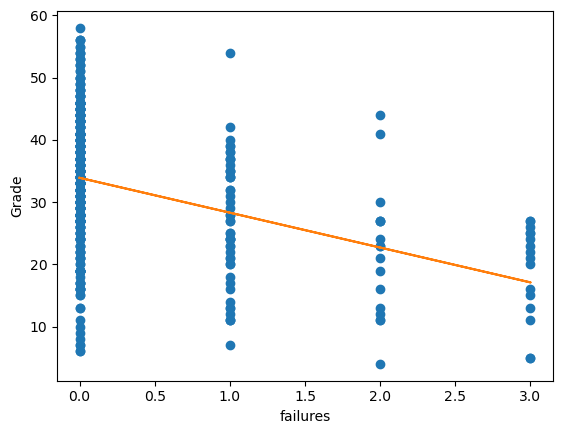

In [6]:

x = X[:,3]
y = X[:,11]
plt.xlabel(my_dataset.columns[3])
plt.ylabel(my_dataset.columns[11])

plt.plot(x, y, 'o')

#obtain m (slope) and b(intercept) of linear regression line
m, b = np.polyfit(x, y, 1)

#add linear regression line to scatterplot 
plt.plot(x, m*x+b)
plt.show()

<Axes: >

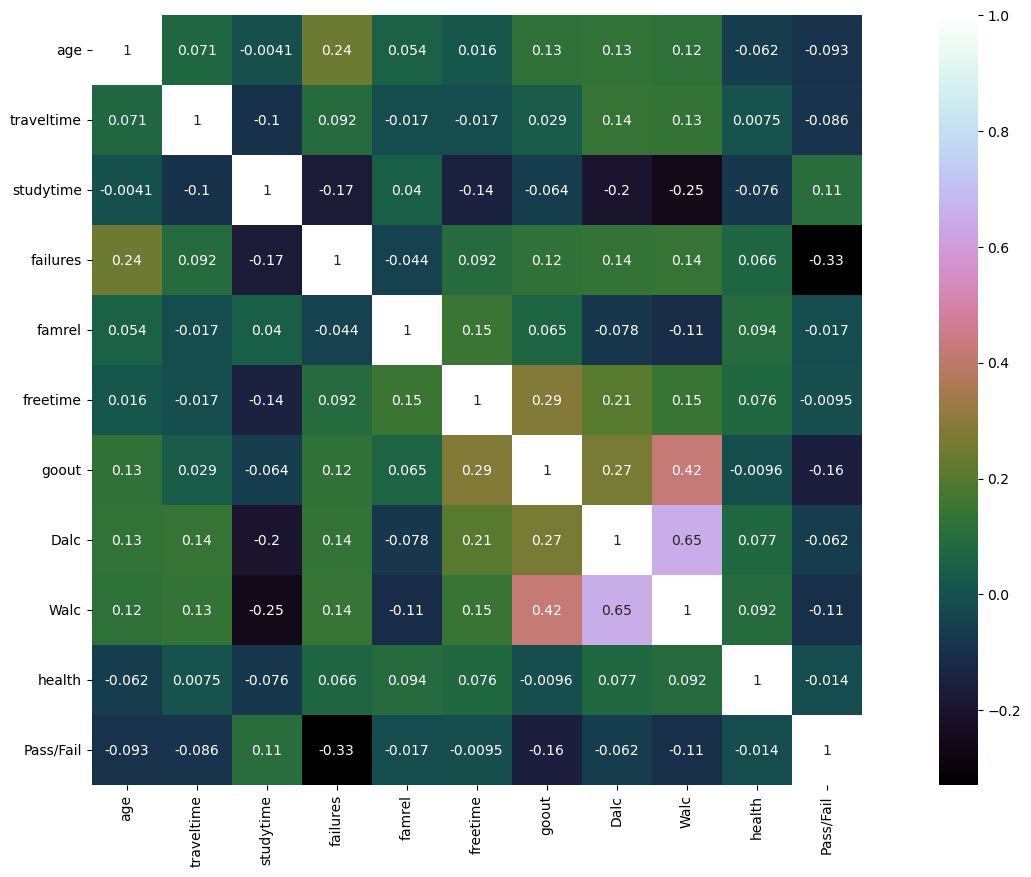

In [7]:
import seaborn as sns
data_for_visualisation = my_working_dataset[["age","traveltime","studytime","failures","famrel","freetime","goout","Dalc","Walc","health","Pass/Fail"]]
my_correlation_matrix = data_for_visualisation.corr(method='pearson')
plt.figure(figsize=(20,10))
sns.heatmap(my_correlation_matrix,vmax=1,square=True,annot=True,cmap='cubehelix') # does the data have som correlation?

## Task 1.3 c) 

In [8]:
my_dataset.describe()

,age,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,Grade,Pass/Fail
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,32.037975,0.546835
std,1.276043,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,11.090357,0.498433
min,15.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,4.000000,0.000000
25%,16.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,25.000000,0.000000
50%,17.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,32.000000,1.000000
75%,18.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,40.000000,1.000000
max,22.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,58.000000,1.000000


[22]


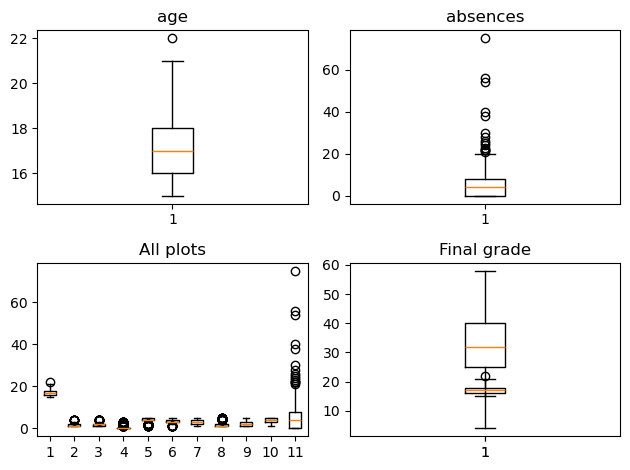

In [9]:
fig, axs = plt.subplots(2, 2)

axs[0, 0].boxplot(X[:, 0])
axs[0, 0].set_title(my_dataset.columns[0])
#plt.ylim(14,23)

axs[1, 0].boxplot(X[:, :11])
axs[1, 0].set_title("All plots")
#plt.ylim(0.5,5.5)

axs[0, 1].boxplot(X[:, 10])
axs[0, 1].set_title(my_dataset.columns[10])
#plt.ylim(-1,80)

axs[1, 1].boxplot(X[:,11])
axs[1, 1].set_title("Final grade")
#plt.ylim(-1,61)
fig.tight_layout()
outliers=plt.boxplot(X[:,0])["fliers"][0].get_data()[1]
print(outliers)

In [10]:
def find_outlier(ds, col):
    quart1 = ds[col].quantile(0.25)
    quart3 = ds[col].quantile(0.75)
    IQR = quart3 - quart1 #Inter-quartile range
    low_val = quart1 - 1.5*IQR
    high_val = quart3 + 1.5*IQR
    ds = ds.loc[(ds[col] < low_val) | (ds[col] > high_val)]
    return ds

In [11]:
outliers = find_outlier(my_dataset,"absences")
outliers.head()

,age,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,Grade,Pass/Fail
40,16,2,2,1,3,3,3,1,2,3,25,28,0
74,16,1,2,0,4,3,3,2,4,5,54,34,1
103,15,2,2,0,4,3,5,1,1,2,26,19,0
183,17,1,2,0,5,3,3,2,3,1,56,26,0
198,17,2,1,1,4,2,4,2,3,2,24,54,1


## Example removing outliers
---
def remove_outlier(ds, col):
    quart1 = ds[col].quantile(0.25)
    quart3 = ds[col].quantile(0.75)
    IQR = quart3 - quart1 #Interquartile
    range
    low_val = quart1 - 1.5*IQR
    high_val = quart3 + 1.5*IQR
    df_out = ds.loc[(ds[col] > low_val) & (ds[col] < high_val)]
    return df_out
#data = remove_outlier(data,"absences")
#data.dropna(axis=0, how='any')

## Task 1.3 f)

Text(0.5, 0.98, 'Feature pairplot')

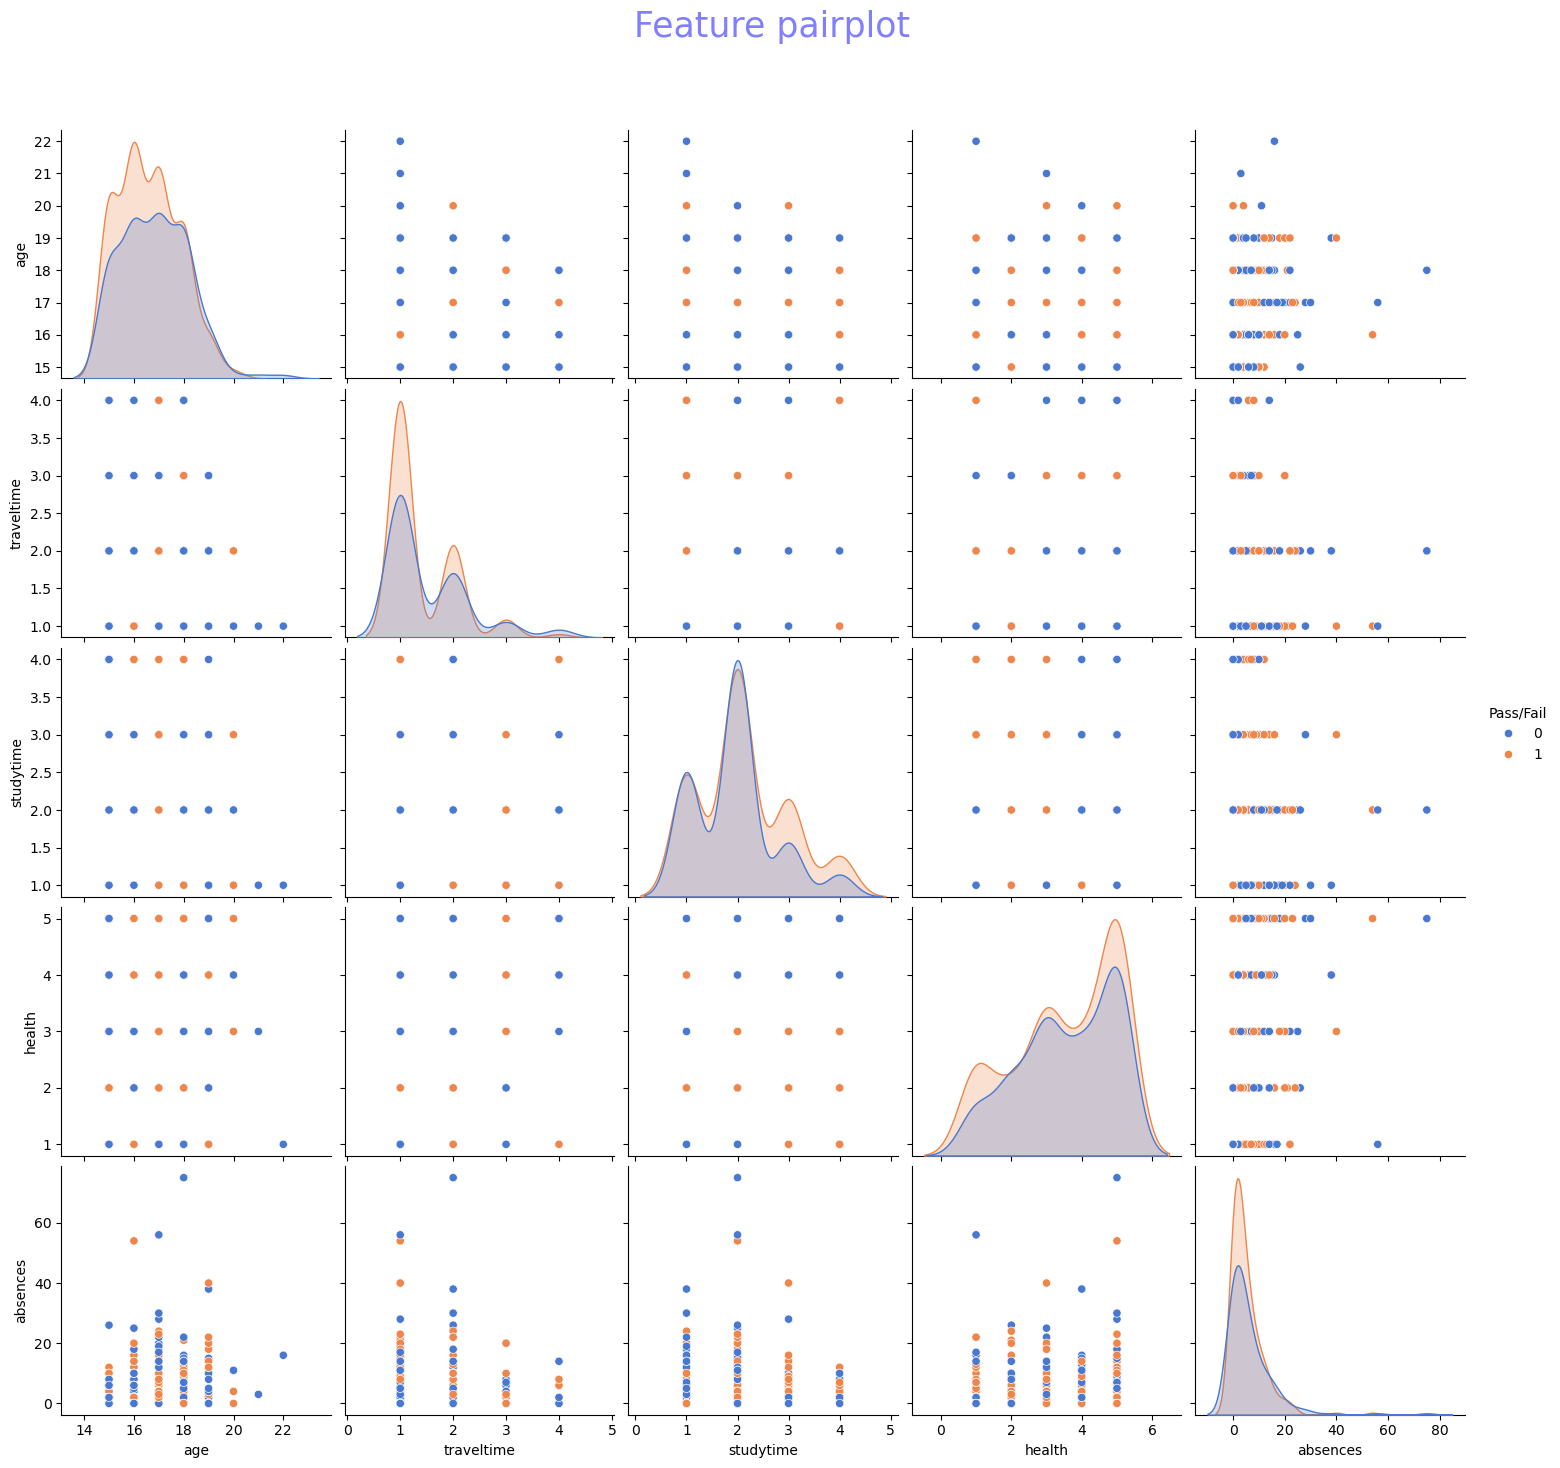

In [12]:
import seaborn as sns
my_working_dataset = my_dataset[
    ["age", "traveltime", "studytime", "failures", "famrel", "freetime", "goout", "Dalc", "Walc", "health", "absences",
     "Grade", "Pass/Fail"]]
#my_pairplot = sns.pairplot(my_working_dataset,hue='Pass/Fail',palette="muted",height=3,vars=["age","traveltime","studytime","failures","famrel","freetime","goout","Dalc","Walc","health","absences"],kind='scatter')
my_pairplot = sns.pairplot(my_working_dataset,hue='Pass/Fail',palette="muted",height=3,vars=["age","traveltime","studytime","health","absences"],kind='scatter')

plt.subplots_adjust(top=0.9)

my_pairplot.fig.suptitle('Feature pairplot',fontsize=25,color='b',alpha=0.5)